In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Mounted at /content/drive
TensorFlow version: 2.19.0


In [ ]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 64 Dec 12 18:34 kaggle.json
{"username":"zeeellll","key":"09f1fe881c66a51b94152a72bd8da97a"}

In [20]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

In [21]:
!kaggle datasets download -d hojjatk/mnist-dataset
!unzip mnist-dataset.zip -d mnist_data

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
  0% 0.00/22.0M [00:00<?, ?B/s]
100% 22.0M/22.0M [00:00<00:00, 1.18GB/s]
Archive:  mnist-dataset.zip
  inflating: mnist_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: mnist_data/t10k-images.idx3-ubyte  
  inflating: mnist_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: mnist_data/t10k-labels.idx1-ubyte  
  inflating: mnist_data/train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: mnist_data/train-images.idx3-ubyte  
  inflating: mnist_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: mnist_data/train-labels.idx1-ubyte  


In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape for Conv2D
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# add channel dim
x_train = np.expand_dims(x_train, -1) # shape (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# one-hot labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(x_train.shape, y_train_cat.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [24]:
def make_model(input_shape=(28,28,1), num_classes=10):
  inp = layers.Input(shape=input_shape)
  x = layers.Conv2D(32, 3, activation='relu', padding='same')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
  x = layers.MaxPool2D(2)(x)
  x = layers.Dropout(0.25)(x)

  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.MaxPool2D(2)(x)
  x = layers.Dropout(0.25)(x)

  x = layers.Flatten()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.5)(x)
  out = layers.Dense(num_classes, activation='softmax')(x)

  model = models.Model(inp, out)
  return model

model = make_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,714 (1.79 MB)

 Trainable params: 468,266 (1.79 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy']
)

# callbacks: checkpoint to Drive
drive_path = '/content/drive/MyDrive/mnist_models'
os.makedirs(drive_path, exist_ok=True)
checkpoint_path = os.path.join(drive_path, 'mnist_cnn_best.h5')

callbacks = [
EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
]

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
rotation_range=8,
width_shift_range=0.08,
height_shift_range=0.08,
zoom_range=0.08
)

batch_size = 128
epochs = 4

train_gen = datagen.flow(x_train, y_train_cat, batch_size=batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

history = model.fit(
train_gen,
steps_per_epoch=steps_per_epoch,
epochs=epochs,
validation_data=(x_test, y_test_cat),
callbacks=callbacks
)

Epoch 1/4
467/468 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9602 - loss: 0.1380
Epoch 1: val_loss improved from inf to 0.02801, saving model to /content/drive/MyDrive/mnist_models/mnist_cnn_best.h5


468/468 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9602 - loss: 0.1379 - val_accuracy: 0.9912 - val_loss: 0.0280 - learning_rate: 0.0010
Epoch 2/4
  1/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9922 - loss: 0.0705

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.02801
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9922 - loss: 0.0705 - val_accuracy: 0.9910 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 3/4
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9723 - loss: 0.0924
Epoch 3: val_loss did not improve from 0.02801
468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9723 - loss: 0.0924 - val_accuracy: 0.9904 - val_loss: 0.0301 - learning_rate: 0.0010
Epoch 4/4
  1/468 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9844 - loss: 0.0780
Epoch 4: val_loss improved from 0.02801 to 0.02736, saving model to /content/drive/MyDrive/mnist_models/mnist_cnn_best.h5


468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0780 - val_accuracy: 0.9914 - val_loss: 0.0274 - learning_rate: 0.0010


Test loss: 0.0274 Test acc: 0.9914
Saved model to /content/drive/MyDrive/mnist_models/mnist_cnn.h5


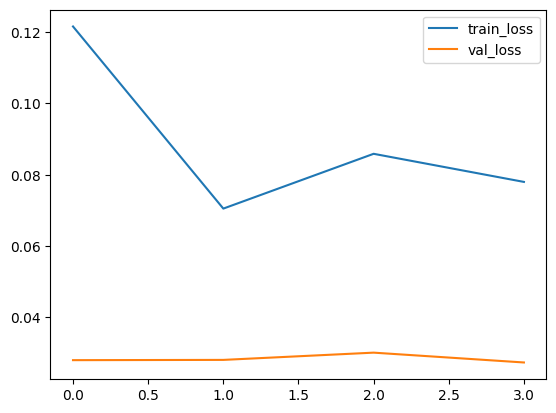

In [28]:
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'Test loss: {loss:.4f} Test acc: {acc:.4f}')

final_path = os.path.join(drive_path, 'mnist_cnn.h5')
model.save(final_path)
print('Saved model to', final_path)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.show()

In [29]:
from google.colab import files
files.download(final_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>